In [30]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [31]:
import matplotlib.pyplot as plt
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [32]:
from crops_package.data import split_and_reduce_data

In [33]:
data = pd.read_csv(f"{os.environ.get('DATA_PATH')}/data.csv")
data['filename'] = os.environ.get("RAW_DATA_PATH") + "/" + data['filename']
data['class'] = data['class'].astype(str)

In [34]:
# train_df, val_df, test_df = split_data(data)
train_df, val_df, test_df = split_and_reduce_data(data, 0.75)

In [35]:
from crops_package.data import preprocessor_df
train_generator = preprocessor_df(train_df)
val_generator = preprocessor_df(val_df)

Found 4545 validated image filenames belonging to 22 classes.
Found 803 validated image filenames belonging to 22 classes.


# Model initialization

In [66]:
from tensorflow.keras import layers, regularizers, Sequential
from tensorflow.keras import models

def initialize_model():
    model = models.Sequential()

    ### First Convolution & MaxPooling
    model.add(layers.Conv2D(64, (8,8), input_shape=(128, 128, 3), activation='relu', padding='same'))
    model.add(layers.MaxPool2D(pool_size=(2,2)))

    ### Second Convolution & MaxPooling
    model.add(layers.Conv2D(32, (4,4), activation='relu', padding='same'))
    model.add(layers.MaxPool2D(pool_size=(2,2)))

    model.add(layers.Conv2D(32, (4,4), activation='relu', padding='valid'))
    model.add(layers.MaxPool2D(pool_size=(2,2)))

    model.add(layers.Conv2D(16, (3,3), activation='relu', padding='same'))
    model.add(layers.MaxPool2D(pool_size=(2,2)))

    model.add(layers.Conv2D(16, (3,3), activation='relu', padding='same'))
    model.add(layers.MaxPool2D(pool_size=(2,2)))


    ### Flattening
    model.add(layers.Flatten())

    ### One Fully Connected layer - "Fully Connected" is equivalent to saying "Dense"

    model.add(layers.Dense(16, activation='relu'))
    ### Last layer - Classification Layer with 10 outputs corresponding to 10 digits
    model.add(layers.Dense(22, activation='softmax'))

    ### Model compilation
    model.compile(loss='categorical_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy', tf.keras.metrics.Precision()])

    return model

In [64]:
model_6_small = initialize_model()
model_6_small.summary()

Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_203 (Conv2D)         (None, 224, 224, 64)      12352     
                                                                 
 max_pooling2d_143 (MaxPool  (None, 112, 112, 64)      0         
 ing2D)                                                          
                                                                 
 conv2d_204 (Conv2D)         (None, 112, 112, 32)      32800     
                                                                 
 max_pooling2d_144 (MaxPool  (None, 56, 56, 32)        0         
 ing2D)                                                          
                                                                 
 conv2d_205 (Conv2D)         (None, 53, 53, 32)        16416     
                                                                 
 max_pooling2d_145 (MaxPool  (None, 26, 26, 32)      

# fit model with earlystopping

In [55]:
# from tensorflow.keras.callbacks import EarlyStopping

# model_1 = initialize_model()

# es = EarlyStopping(patience = 5, verbose = 2)

# history_1 = model_1.fit(train_generator,
#                      validation_data= val_generator,
#                      callbacks = [es],
#                      epochs = 250,
#                      batch_size = 16)

In [65]:
from tensorflow.keras.callbacks import EarlyStopping
from crops_package.model import fit_and_save_model
from PIL import Image, ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

%load_ext tensorboard
from tensorboard import notebook

model_7_small = initialize_model()

model_name = "model_6_small"

model_7_small_hist = fit_and_save_model(model_7_small, train_generator, val_generator, model_name, split=0.3, epochs=100)

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard
Saving TensorBoard log files to: /home/wouter/code/MahautHDL/save_the_crops/callbacks/model_6_small-20240311-084609
Epoch 1/100


TypeError: in user code:

    File "/home/wouter/.pyenv/versions/3.10.6/envs/save_the_crops/lib/python3.10/site-packages/keras/src/engine/training.py", line 1401, in train_function  *
        return step_function(self, iterator)
    File "/home/wouter/.pyenv/versions/3.10.6/envs/save_the_crops/lib/python3.10/site-packages/keras/src/engine/training.py", line 1384, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/home/wouter/.pyenv/versions/3.10.6/envs/save_the_crops/lib/python3.10/site-packages/keras/src/engine/training.py", line 1373, in run_step  **
        outputs = model.train_step(data)
    File "/home/wouter/.pyenv/versions/3.10.6/envs/save_the_crops/lib/python3.10/site-packages/keras/src/engine/training.py", line 1155, in train_step
        return self.compute_metrics(x, y, y_pred, sample_weight)
    File "/home/wouter/.pyenv/versions/3.10.6/envs/save_the_crops/lib/python3.10/site-packages/keras/src/engine/training.py", line 1249, in compute_metrics
        self.compiled_metrics.update_state(y, y_pred, sample_weight)
    File "/home/wouter/.pyenv/versions/3.10.6/envs/save_the_crops/lib/python3.10/site-packages/keras/src/engine/compile_utils.py", line 620, in update_state
        metric_obj.update_state(y_t, y_p, sample_weight=mask)
    File "/home/wouter/.pyenv/versions/3.10.6/envs/save_the_crops/lib/python3.10/site-packages/keras/src/utils/metrics_utils.py", line 77, in decorated
        result = update_state_fn(*args, **kwargs)
    File "/home/wouter/.pyenv/versions/3.10.6/envs/save_the_crops/lib/python3.10/site-packages/keras/src/metrics/base_metric.py", line 140, in update_state_fn
        return ag_update_state(*args, **kwargs)
    File "/home/wouter/.pyenv/versions/3.10.6/envs/save_the_crops/lib/python3.10/site-packages/keras/src/metrics/base_metric.py", line 723, in update_state  **
        matches = ag_fn(y_true, y_pred, **self._fn_kwargs)

    TypeError: 'str' object is not callable


In [34]:
%tensorboard --logdir ../callbacks
notebook.list() # View open TensorBoard instances


INFO:tensorflow:Assets written to: /Users/thomasverpoort/code/MahautHDL/save_the_crops/models/first_model_07_03/assets


INFO:tensorflow:Assets written to: /Users/thomasverpoort/code/MahautHDL/save_the_crops/models/first_model_07_03/assets


## Plotting History

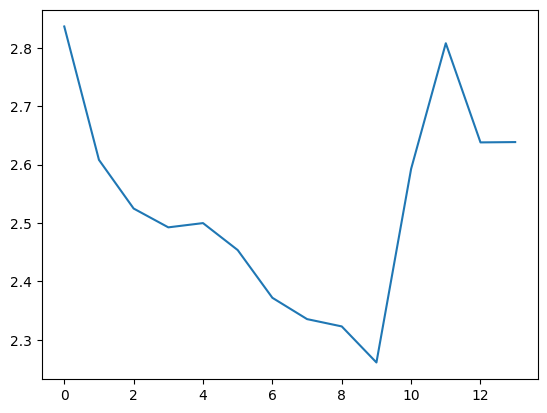

In [35]:
plt.plot(model_1_small_pad_valid.history['loss'])

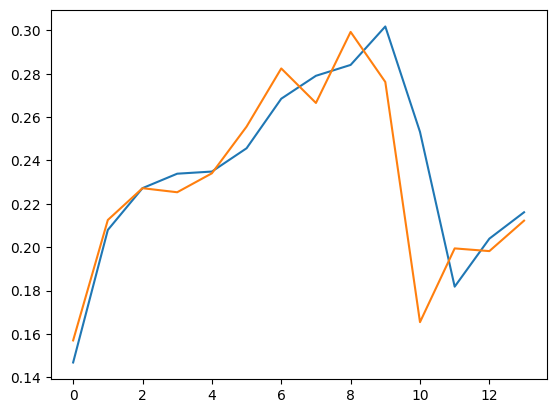

In [36]:
plt.plot(history_small.history['accuracy'], label='train accuracy' )
plt.plot(history_small.history['val_accuracy'], label='val accuracy')

# Evaluation

In [37]:
from crops_package.data import preprocessor_test

In [38]:
test_generator = preprocessor_test(test_df)

Found 3769 validated image filenames belonging to 22 classes.


In [39]:
res = model_small.evaluate(test_generator, verbose = 0)
res

[2.589270830154419, 0.22631998360157013]

In [69]:
test_generator.class_indices

{'Cashew anthracnose': 0,
 'Cashew gumosis': 1,
 'Cashew healthy': 2,
 'Cashew leaf miner': 3,
 'Cashew red rust': 4,
 'Cassava bacterial blight': 5,
 'Cassava brown spot': 6,
 'Cassava green mite': 7,
 'Cassava healthy': 8,
 'Cassava mosaic': 9,
 'Maize fall armyworm': 10,
 'Maize grasshoper': 11,
 'Maize healthy': 12,
 'Maize leaf beetle': 13,
 'Maize leaf blight': 14,
 'Maize leaf spot': 15,
 'Maize streak virus': 16,
 'Tomato healthy': 17,
 'Tomato leaf blight': 18,
 'Tomato leaf curl': 19,
 'Tomato septoria leaf spot': 20,
 'Tomato verticulium wilt': 21}

In [70]:
train_generator.class_indices

{'Cashew anthracnose': 0,
 'Cashew gumosis': 1,
 'Cashew healthy': 2,
 'Cashew leaf miner': 3,
 'Cashew red rust': 4,
 'Cassava bacterial blight': 5,
 'Cassava brown spot': 6,
 'Cassava green mite': 7,
 'Cassava healthy': 8,
 'Cassava mosaic': 9,
 'Maize fall armyworm': 10,
 'Maize grasshoper': 11,
 'Maize healthy': 12,
 'Maize leaf beetle': 13,
 'Maize leaf blight': 14,
 'Maize leaf spot': 15,
 'Maize streak virus': 16,
 'Tomato healthy': 17,
 'Tomato leaf blight': 18,
 'Tomato leaf curl': 19,
 'Tomato septoria leaf spot': 20,
 'Tomato verticulium wilt': 21}

# Predictions

In [59]:
index = 10
filepath = list(test_df['filename'])[index]
filename = list(test_df['class'])[index]
filepath

'/Users/thomasverpoort/code/MahautHDL/save_the_crops/raw_data/Maize grasshoper/grasshoper670_.jpg'

In [60]:
from crops_package.data import prepocessor_img
img_processed = prepocessor_img(filepath)

In [77]:
predictions = model_small.predict(img_processed)
predictions

1/1 [==============================] - 0s 118ms/step


array([[0.000000e+00, 0.000000e+00, 0.000000e+00, 8.039834e-36,
        0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        1.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 0.000000e+00]], dtype=float32)

In [65]:
class_names = list(test_generator.class_indices.keys())

In [67]:
print(f"{class_names[np.argmax(predictions)]} - {np.max(predictions)* 100:.2f}%")

Cassava healthy - 100.00%


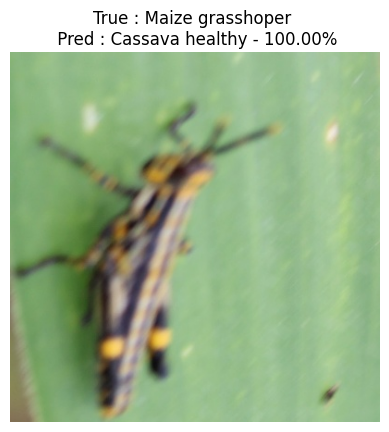

In [68]:
img = plt.imread(filepath)

plt.imshow(img)
plt.axis(False)
plt.title(f"True : {filename} \n Pred : {class_names[np.argmax(predictions)]} - {np.max(predictions)* 100:.2f}%")
plt.show()